In [5]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from mpl_toolkits.mplot3d import axes3d
os.chdir('../')
from models.DenseNet3D import *
from keras.optimizers import adam

In [8]:
learning_rate = 1e-5
decay_rate = learning_rate/300

model = DenseNet3D_FCN((48, 48, 48, 1), nb_dense_block=2, growth_rate=8,
        nb_layers_per_block=2, upsampling_type='upsampling', classes=1, activation='sigmoid')
model.compile(optimizer=adam(lr=learning_rate, decay=decay_rate), loss=dice_coef_loss, metrics=[dice_coef])


NameError: name 'dice_coef_loss' is not defined

In [ ]:
path = '/storage/filament/result/cluster_3d/40Mpc/density_log_plot/label_conn/box01/'

In [21]:
#subbox_list = os.listdir(path)            
test = np.zeros([9,96,96,96])
for n,subbox_num in enumerate(os.listdir(path)):
    os.chdir(path + subbox_num +'/')
    for nn,_ in enumerate(os.listdir()):
        test[n,:,:,nn] = np.array((cv2.imread(str(nn) + '.png',cv2.IMREAD_GRAYSCALE)))

In [25]:
test_crop = test[:,24:72,24:72,24:72]

In [26]:
test_re = test_crop.reshape([9,48**3])

In [37]:
pca1 = PCA(n_components=2)
X_low = pca1.fit_transform(test_re)
X2 = pca1.inverse_transform(X_low)

In [ ]:
i=3
print(X_low[i,0],X_low[i,1],X_low[i,2])

In [ ]:
X_low[:,0].shape

(9,)

TypeError: scatter() missing 1 required positional argument: 'ys'

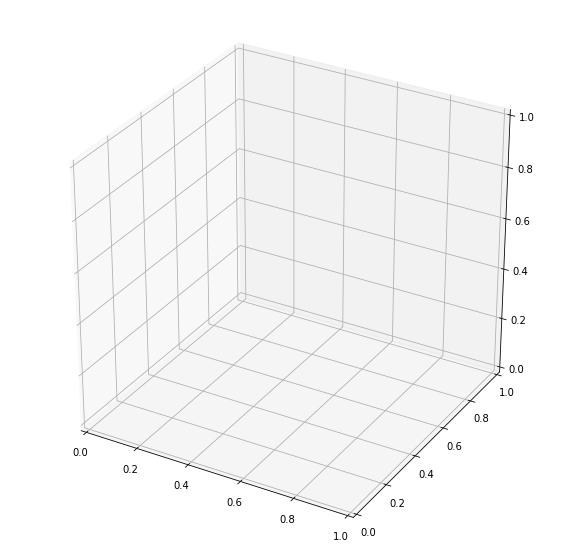

In [45]:
plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.scatter(X_low,s=10)

In [ ]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()